In [118]:
import sys
sys.path.insert(0, '..')
import numpy as np
import qiskit
import qtm.evolution
import qtm.state
import qtm.qcompilation
import qtm.ansatz
import qtm.constant
from qtm.evolution import environment, mutate, selection, crossover, utils
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [120]:
qc_haar = qtm.state.create_haar_state(3)


def compilation_fitness(qc: qiskit.QuantumCircuit, num_steps = 5):
    compiler = qtm.qcompilation.QuantumCompilation(
        u=qc,
        vdagger=qc_haar.inverse(),
        optimizer='adam',
        loss_func='loss_fubini_study'
    )
    compiler.fit(num_steps=num_steps, verbose=0)
    return np.average(compiler.loss_values)

def compilation_threshold(fitness_value):
    if fitness_value < 0.4: 
        return True
    return False

### Envobj will be created and auto-saved after each generation

In [ ]:
params = {'depth': 4,
          'num_circuit': 8,  # Must mod 8 = 0
          'num_generation': 10,
          'num_qubits': 3,
          'threshold': compilation_threshold,
          'prob_mutate': 0.01}

env = environment.EEnvironment(
    params,
    fitness_func = compilation_fitness,
    selection_func = selection.elitist_selection,
    crossover_func= crossover.onepoint_crossover,
    mutate_func=mutate.bitflip_mutate,
    pool = qtm.constant.operations,
    file_name = '../experiments/evolution/'
)

env.evol() 

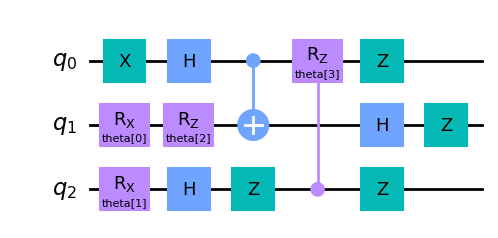

In [156]:
env.best_candidate.qc.draw('mpl')

### Load envobj object and continute evol by using the same method evol()

In [162]:
env2 = environment.EEnvironment("../experiments/evolution/ga_compilation_fitness_2023-10-06.envobj")

In [163]:
env2.evol()

Step:   0%|          | 0/10 [00:00<?, ?it/s]


In [161]:
env2.params

{'depth': 4,
 'num_circuit': 8,
 'num_generation': 10,
 'num_qubits': 3,
 'threshold': <function __main__.compilation_threshold(fitness_value)>,
 'prob_mutate': 0.01}